# Document

# Prediction Stroke

Writen By Natthanan Wannapha and Thanyathon Sopha

Project : introduce data science

DataSet : kaggle

Process Project :

- We start by taking the data from the kaggle and then check the data if there is an abnormal value or not.
- Then clean the data of the abnormal values ​​and do EDA to bring the analysis 
- We analyze data from viewing EDA.
- After that, we do Future Engineering by extracting the colume with the same value in the column into values ​​that are 0 and 1.
- After that we do modeling (classification) using randomforestclassifier algorithm.
- Then we get modeling and do the ensemble, finally we check accuracy.



# Import

In [ ]:
!pip install imbalanced-learn

In [ ]:
# import
import pandas as pd
import matplotlib.pyplot as plt 
import seaborn as sns

from matplotlib.pyplot import figure
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.ensemble import RandomForestClassifier

from sklearn.ensemble import BaggingClassifier

# Get Data

We start download dataset from kaggle.

In [ ]:
data = pd.read_csv('healthcare-dataset-stroke-data.csv') #Read file
df = pd.DataFrame(data) #File to dataframe
df.shape #shape of dataframe

(5110, 12)

# Clean Data

## Check Data

In [ ]:
# show data.
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [ ]:
# check info of data.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


In [ ]:
# check 'describe'.
df.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,5110.000000,5110.000000,5110.000000,5110.000000,5110.000000,4909.000000,5110.000000
mean,36517.829354,43.226614,0.097456,0.054012,106.147677,28.893237,0.048728
std,21161.721625,22.612647,0.296607,0.226063,45.283560,7.854067,0.215320
min,67.000000,0.080000,0.000000,0.000000,55.120000,10.300000,0.000000
25%,17741.250000,25.000000,0.000000,0.000000,77.245000,23.500000,0.000000
50%,36932.000000,45.000000,0.000000,0.000000,91.885000,28.100000,0.000000
75%,54682.000000,61.000000,0.000000,0.000000,114.090000,33.100000,0.000000
max,72940.000000,82.000000,1.000000,1.000000,271.740000,97.600000,1.000000


In [ ]:
# check 'NaN'.
df.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  201
smoking_status         0
stroke                 0
dtype: int64

##### check data each column.

check data each column for searching finds missing data.

In [ ]:
# shape
df.shape

(5110, 12)

Here We found 2 unusual data, it is unknown(smoking_status) and Other (gender).

In [ ]:
# smoking_status
df.smoking_status.value_counts()

never smoked       1892
Unknown            1544
formerly smoked     885
smokes              789
Name: smoking_status, dtype: int64

In [ ]:
# gender
df.gender.value_counts()

Female    2994
Male      2115
Other        1
Name: gender, dtype: int64

In [ ]:
# work_type
df.work_type.value_counts()

Private          2925
Self-employed     819
children          687
Govt_job          657
Never_worked       22
Name: work_type, dtype: int64


Once we have checked the data, we will continue to clean the data in order to use the data for EDA and Modeling.

## Clean/format the data

In [ ]:
# check data
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5110 entries, 0 to 5109
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 5110 non-null   int64  
 1   gender             5110 non-null   object 
 2   age                5110 non-null   float64
 3   hypertension       5110 non-null   int64  
 4   heart_disease      5110 non-null   int64  
 5   ever_married       5110 non-null   object 
 6   work_type          5110 non-null   object 
 7   Residence_type     5110 non-null   object 
 8   avg_glucose_level  5110 non-null   float64
 9   bmi                4909 non-null   float64
 10  smoking_status     5110 non-null   object 
 11  stroke             5110 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 479.2+ KB


When We find its (unknown(smoking_status) and Other(gender))
Then We drop its by row.

In [ ]:
# drop data in column that is 'Unknown'.
df_cleaning = df.copy()
index_smoking_status = df_cleaning[df_cleaning['smoking_status'] == 'Unknown'].index
df_cleaning.drop(index_smoking_status, inplace = True)

In [ ]:
# drop data in column that is 'other'.
index_gender = df_cleaning[df_cleaning['gender'] == 'Other'].index
df_cleaning.drop(index_gender, inplace = True)

In [ ]:
df_cleaning.shape

(3565, 12)

Here we find NaN of bmi and drop it out in that record.

In [ ]:
# sum record that has 'NaN'.
df_cleaning.isna().sum()

id                     0
gender                 0
age                    0
hypertension           0
heart_disease          0
ever_married           0
work_type              0
Residence_type         0
avg_glucose_level      0
bmi                  140
smoking_status         0
stroke                 0
dtype: int64

In [ ]:
# del record that has 'NaN' by '.dropna'.
df_clean = df_cleaning.dropna()

In [ ]:
# check df_nona describe.
df_clean.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,37333.512117,48.652555,0.119124,0.060146,108.311670,30.292350,0.052555
std,21050.593185,18.850018,0.323982,0.237792,47.706754,7.295778,0.223175
min,84.000000,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,18986.000000,34.000000,0.000000,0.000000,77.230000,25.300000,0.000000
50%,38067.000000,50.000000,0.000000,0.000000,92.350000,29.100000,0.000000
75%,55459.000000,63.000000,0.000000,0.000000,116.200000,34.100000,0.000000
max,72915.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


In [ ]:
# copy data 
df_nona = df_clean.copy()

# EDA (Exploratory Data Analysis)

In this section, we take the clean data and do it in the EDA section for data analysis to be used for modeling.

## Global Properties

Broad data EDA with an overview of the data.

In [ ]:
# check data
df_nona.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 3425 non-null   int64  
 1   gender             3425 non-null   object 
 2   age                3425 non-null   float64
 3   hypertension       3425 non-null   int64  
 4   heart_disease      3425 non-null   int64  
 5   ever_married       3425 non-null   object 
 6   work_type          3425 non-null   object 
 7   Residence_type     3425 non-null   object 
 8   avg_glucose_level  3425 non-null   float64
 9   bmi                3425 non-null   float64
 10  smoking_status     3425 non-null   object 
 11  stroke             3425 non-null   int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 347.9+ KB


In [ ]:
# shape
df_nona.shape

(3425, 12)

In [ ]:
# show head of data.
df_nona.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1


In [ ]:
# show decribe of data.
df_nona.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke
count,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000,3425.000000
mean,37333.512117,48.652555,0.119124,0.060146,108.311670,30.292350,0.052555
std,21050.593185,18.850018,0.323982,0.237792,47.706754,7.295778,0.223175
min,84.000000,10.000000,0.000000,0.000000,55.120000,11.500000,0.000000
25%,18986.000000,34.000000,0.000000,0.000000,77.230000,25.300000,0.000000
50%,38067.000000,50.000000,0.000000,0.000000,92.350000,29.100000,0.000000
75%,55459.000000,63.000000,0.000000,0.000000,116.200000,34.100000,0.000000
max,72915.000000,82.000000,1.000000,1.000000,271.740000,92.000000,1.000000


It was observed that stroke was strongly associated with age, but was not strongly associated with bmi.

(array([0.5, 1.5, 2.5, 3.5, 4.5, 5.5, 6.5]),
 <a list of 7 Text major ticklabel objects>)

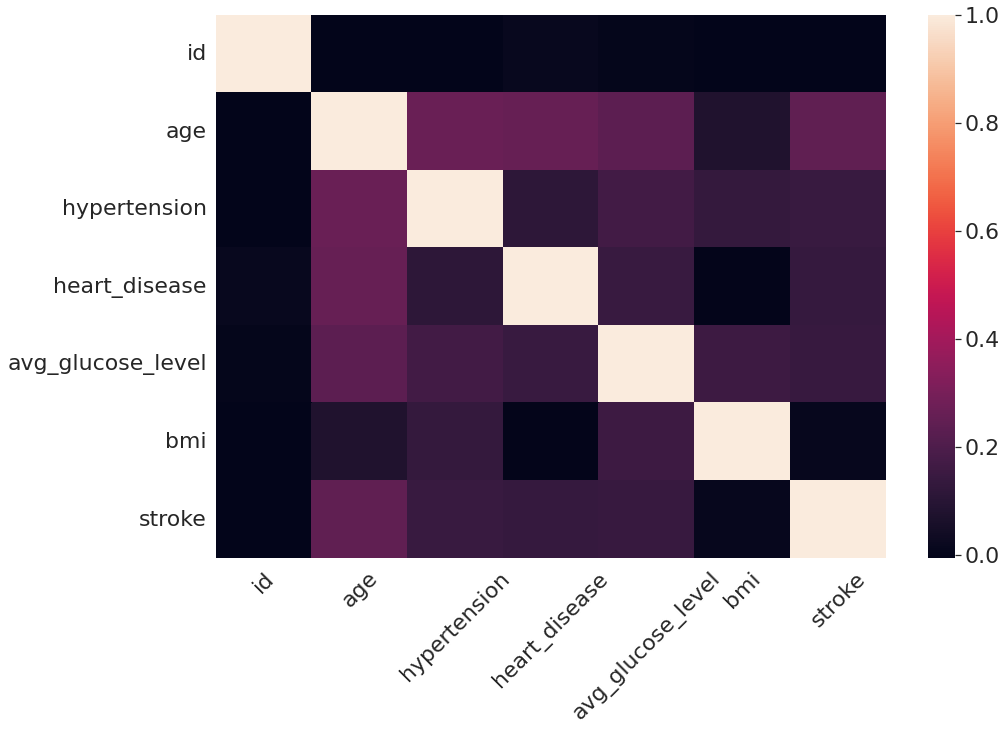

In [ ]:
# Heatmap
plt.figure( figsize= (15,10))
sns.set(font_scale = 2)
sns.heatmap(df_nona.corr())
plt.xticks(rotation=45)

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 25.8% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'stroke and non-stroke against glucose')

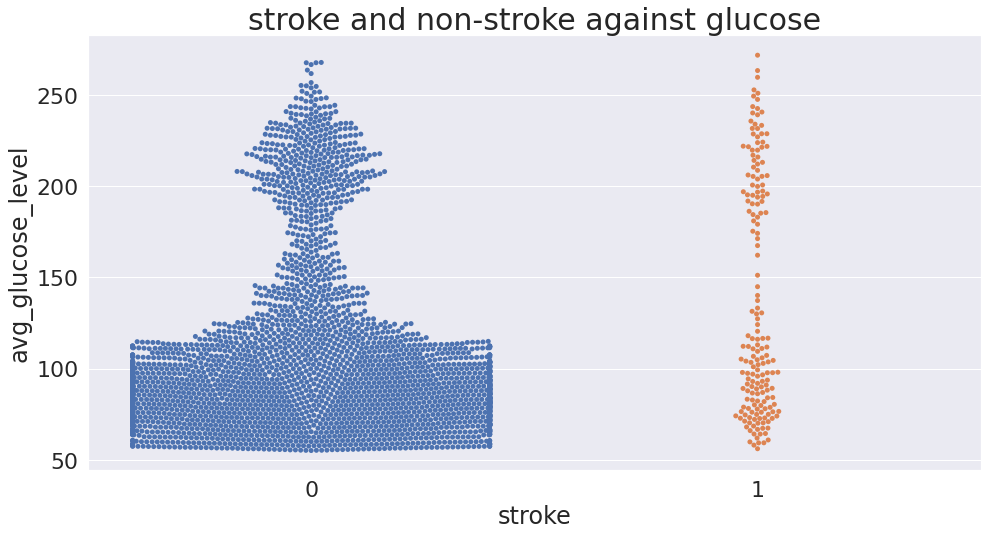

In [ ]:
# swarmplot stroke with avg_glucose_level.
plt.figure( figsize= (16,8))
stgc=sns.swarmplot(x='stroke', y='avg_glucose_level', data=df_nona);
stgc.set_title("stroke and non-stroke against glucose",fontsize=30)

Notice that stroke and non-stroke values ​​with a bmi of 50 and above are very different. In the non-stroke segment, the value is greater than the stroke, occupying bmi 50+ and We will use this observation to take the data this to do Future Engineering.

/usr/local/lib/python3.7/dist-packages/seaborn/categorical.py:1296: UserWarning: 44.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.
  warnings.warn(msg, UserWarning)


Text(0.5, 1.0, 'stroke and non-stroke against bmi')

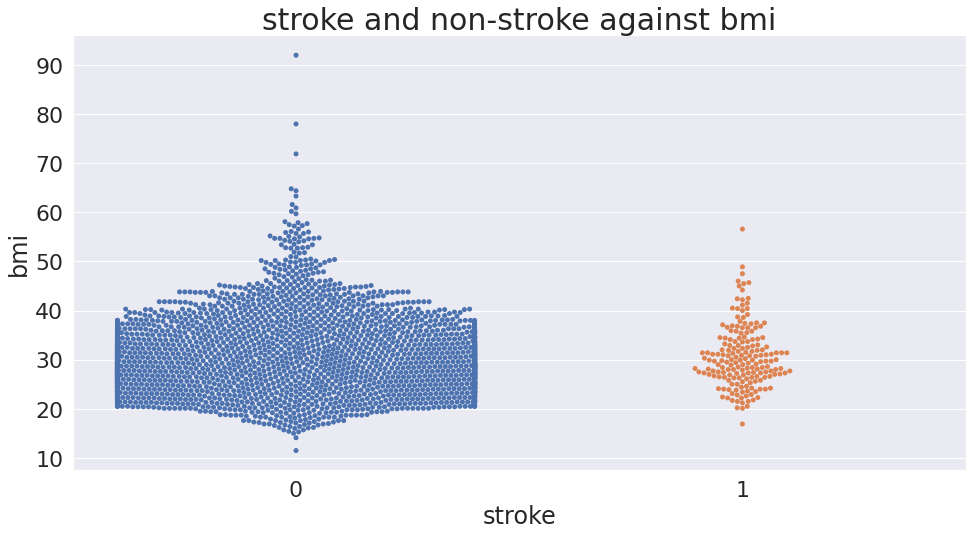

In [ ]:
# swarmplot stroke with bmi.
plt.figure( figsize= (16,8))
stgc=sns.swarmplot(x='stroke', y='bmi', data=df_nona);
stgc.set_title("stroke and non-stroke against bmi",fontsize=30)

Text(0.5, 1.0, 'stroke and non-stroke against age')

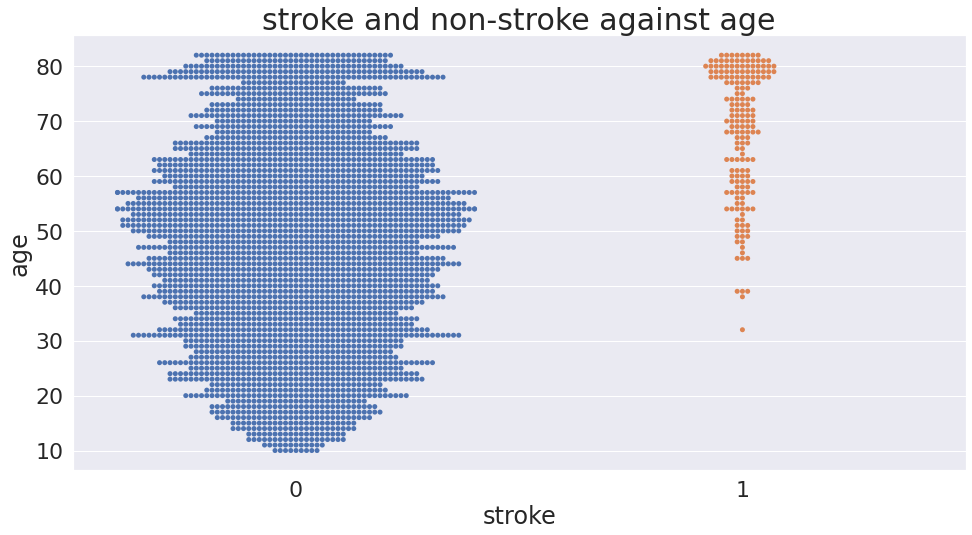

In [ ]:
# swarmplot stroke with age.
plt.figure( figsize= (16,8))
stgc=sns.swarmplot(x='stroke', y='age', data=df_nona);
stgc.set_title("stroke and non-stroke against age",fontsize=30)

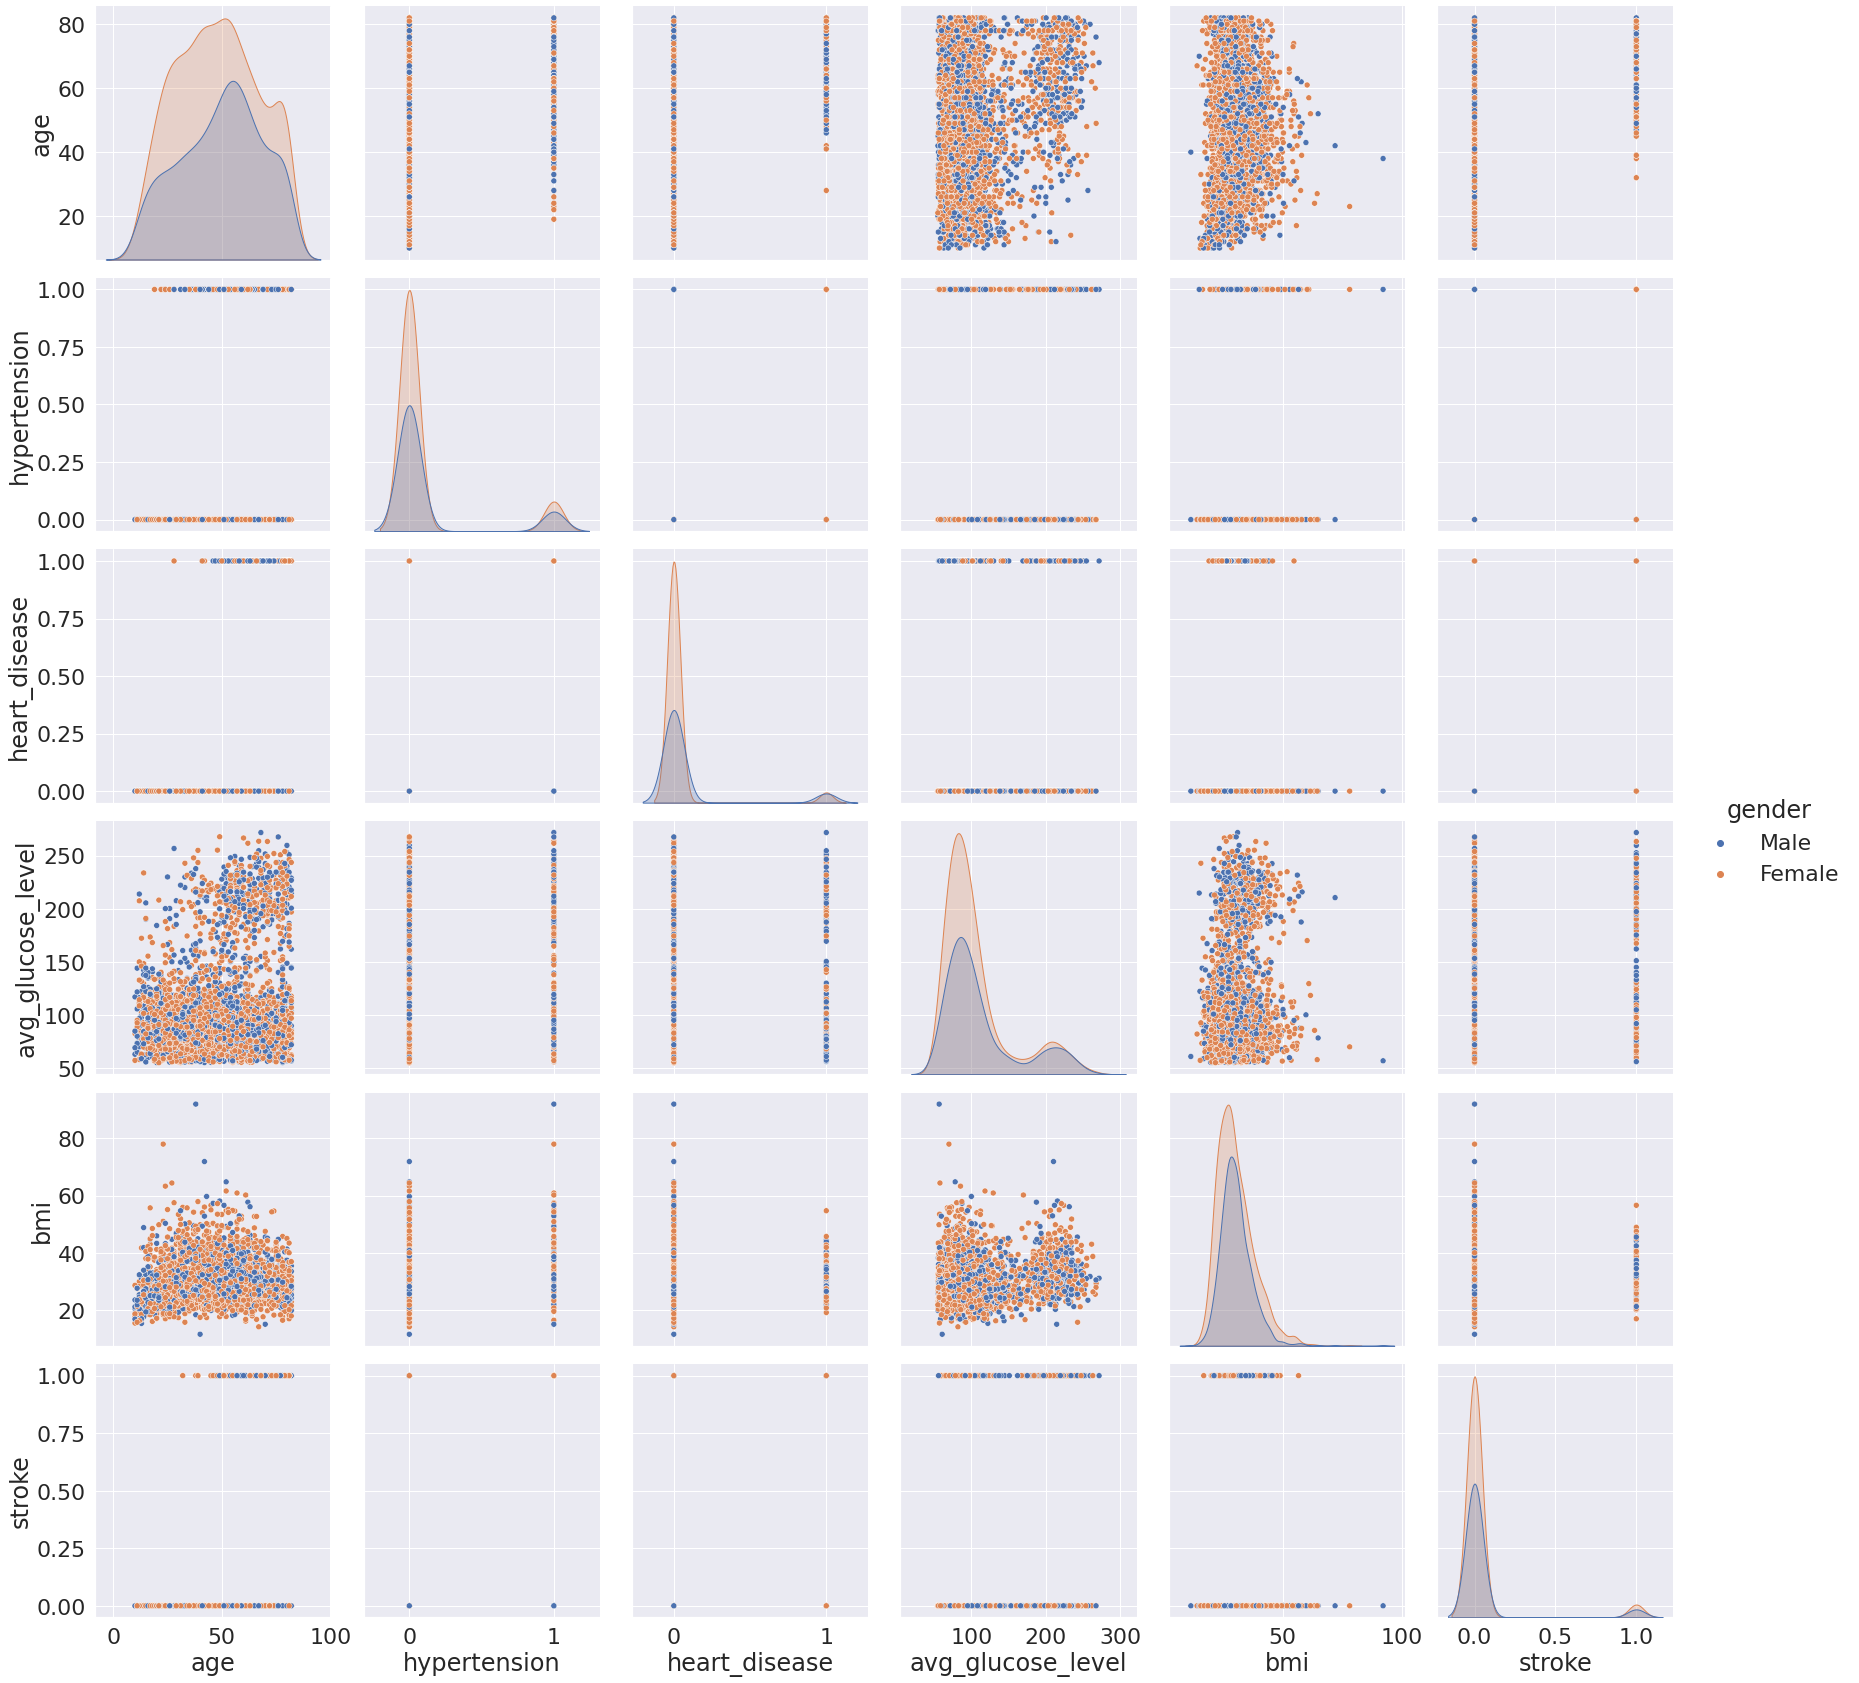

In [ ]:
# show pairplot except 'id'.
sns.pairplot(df_nona.drop(['id'], axis=1), hue ='gender',height= 4)

## Group Properties

In this section, we will do an in-depth EDA to find the relationship of the data.

Stroke and age Strokes range in age from 60 to 80 years old.

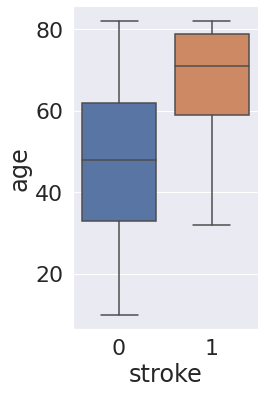

In [ ]:
# box plot show age compare stroke.
sns.catplot(x="stroke", y="age", data= df_nona, kind="box",  height = 6, aspect = 0.7)

Compare the value of hypertension and stroke.

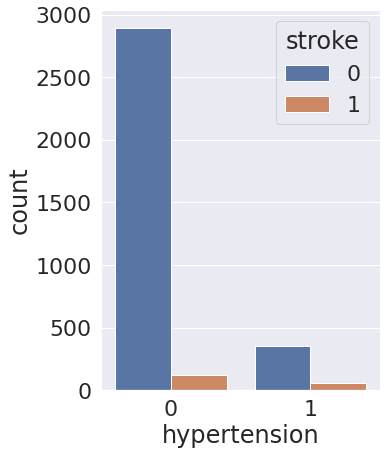

In [ ]:
# box plot show hypertension compare stroke.
plt.figure(figsize=(5, 7))
sns.countplot(x="hypertension", hue="stroke", data= df_nona)

Compare the value of heart_disease and stroke.

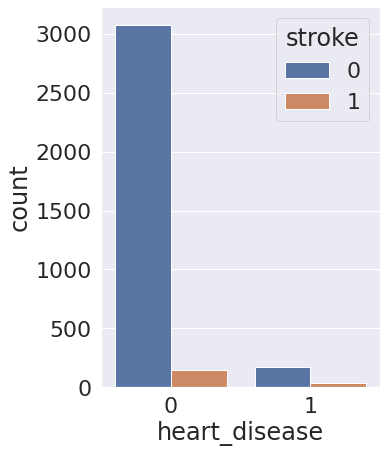

In [ ]:
# box plot show heart_disease compare stroke.
plt.figure(figsize=(5, 7))
sns.countplot(x="heart_disease", hue="stroke", data= df_nona)

Compare the value of avg_glucose_level and stroke.

As for the comparison between avg_glucose_level and stroke, Most strokes have a blood sugar level of 100 - 200.

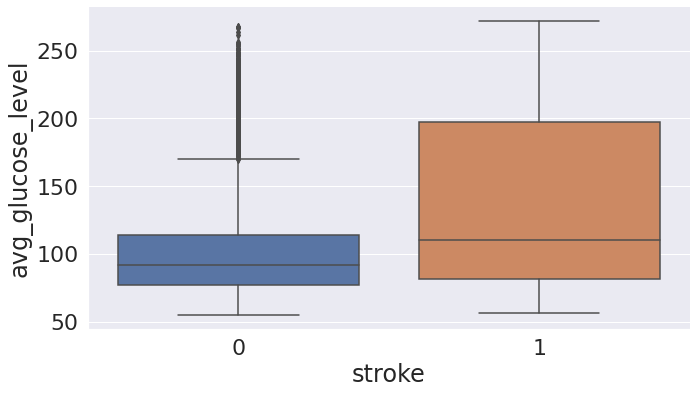

In [ ]:
# box plot show avg_glucose_level and stroke.
sns.catplot(x="stroke", y="avg_glucose_level", data= df_nona, kind="box", height = 6, aspect = 1.7)

Compare the value of ever_married and stroke.

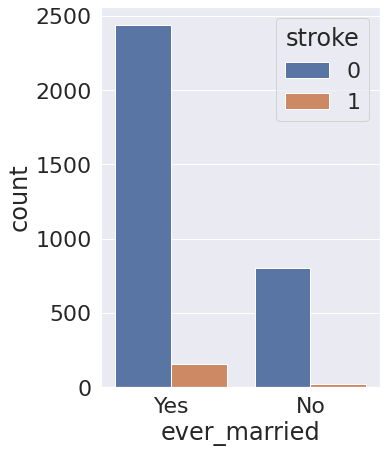

In [ ]:
# box plot show ever_married compare stroke.
plt.figure(figsize=(5, 7))
sns.countplot(x="ever_married", hue="stroke", data= df_nona)

Compare the value of smoking_status and stroke.

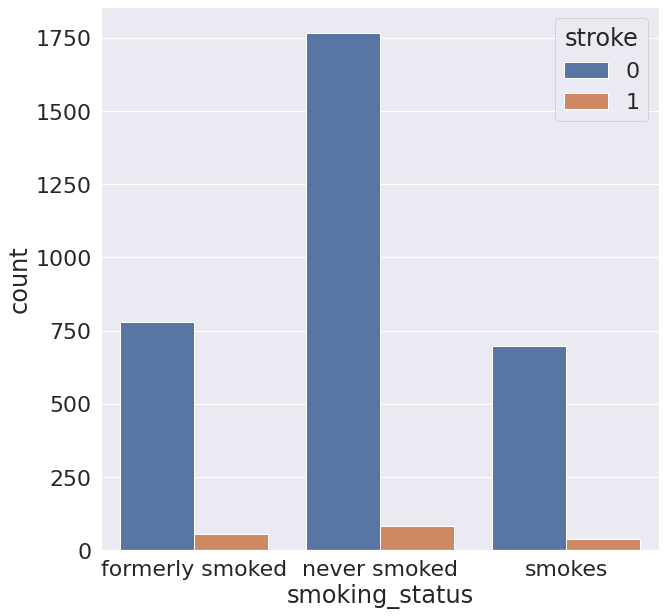

In [ ]:
# box plot show smoking_status compare stroke.
plt.figure(figsize=(10, 10))
sns.countplot(x="smoking_status", hue="stroke", data= df_nona)

Compare the value of work_type and stroke.

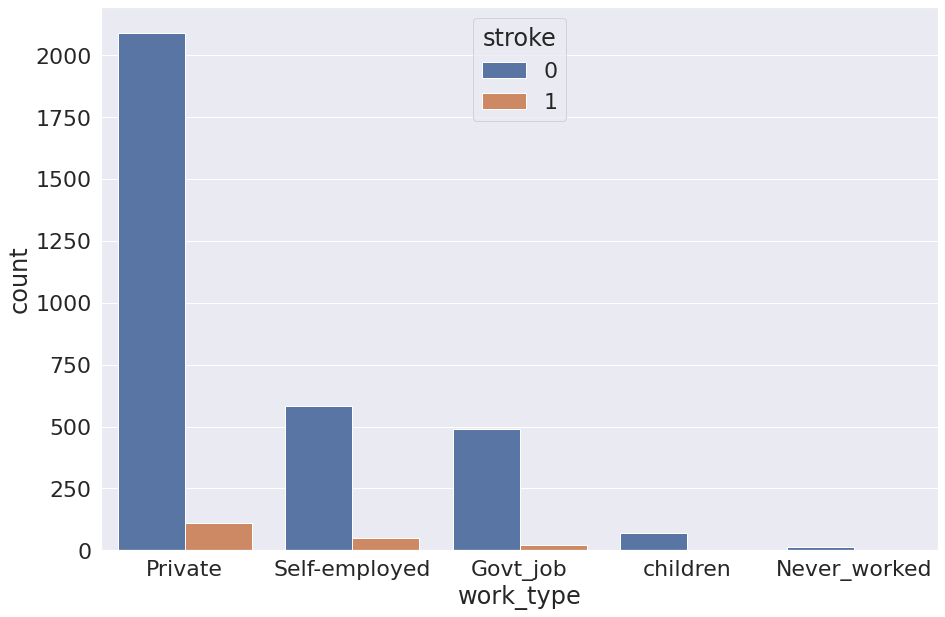

In [ ]:
# box plot show work_type compare stroke.
plt.figure(figsize=(15, 10))
sns.countplot(x="work_type", hue="stroke", data= df_nona)

# Future Engineering

In this part we use future engineering to split the column into 0,1 and Perform data balance and then cut out the BMI mistake data. 

### Dummies df_nona

In [ ]:
df_clean

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1
5,56669,Male,81.0,0,0,Yes,Private,Urban,186.21,29.0,formerly smoked,1
...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,Male,82.0,1,0,Yes,Self-employed,Rural,71.97,28.3,never smoked,0
5102,45010,Female,57.0,0,0,Yes,Private,Rural,77.93,21.7,never smoked,0
5106,44873,Female,81.0,0,0,Yes,Self-employed,Urban,125.20,40.0,never smoked,0
5107,19723,Female,35.0,0,0,Yes,Self-employed,Rural,82.99,30.6,never smoked,0


In [ ]:
# change object for EDA and modeling in DataFrame.
df_nona_balance = df_clean.copy()
df_nona_balance = pd.get_dummies(df_nona_balance, columns=['gender'])
df_nona_balance = pd.get_dummies(df_nona_balance, columns=['ever_married'])
df_nona_balance = pd.get_dummies(df_nona_balance, columns=['work_type'])
df_nona_balance = pd.get_dummies(df_nona_balance, columns=['Residence_type'])
df_nona_balance = pd.get_dummies(df_nona_balance, columns=['smoking_status'])

In [ ]:
df_nona_balance

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.6,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
2,31112,80.0,0,1,105.92,32.5,1,0,1,0,1,0,0,1,0,0,1,0,0,1,0
3,60182,49.0,0,0,171.23,34.4,1,1,0,0,1,0,0,1,0,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.0,1,1,0,0,1,0,0,0,1,0,1,0,0,1,0
5,56669,81.0,0,0,186.21,29.0,1,0,1,0,1,0,0,1,0,0,0,1,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5100,68398,82.0,1,0,71.97,28.3,0,0,1,0,1,0,0,0,1,0,1,0,0,1,0
5102,45010,57.0,0,0,77.93,21.7,0,1,0,0,1,0,0,1,0,0,1,0,0,1,0
5106,44873,81.0,0,0,125.20,40.0,0,1,0,0,1,0,0,0,1,0,0,1,0,1,0
5107,19723,35.0,0,0,82.99,30.6,0,1,0,0,1,0,0,0,1,0,1,0,0,1,0


### Manage dataset imbalance to data balance.

We balance the data to be used in the model stage.

In [ ]:
# show colunm of stroke
df_nona_balance.stroke.value_counts()

0    3245
1     180
Name: stroke, dtype: int64

In [ ]:
# show info data
df_nona_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 3425 entries, 0 to 5108
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              3425 non-null   int64  
 1   age                             3425 non-null   float64
 2   hypertension                    3425 non-null   int64  
 3   heart_disease                   3425 non-null   int64  
 4   avg_glucose_level               3425 non-null   float64
 5   bmi                             3425 non-null   float64
 6   stroke                          3425 non-null   int64  
 7   gender_Female                   3425 non-null   uint8  
 8   gender_Male                     3425 non-null   uint8  
 9   ever_married_No                 3425 non-null   uint8  
 10  ever_married_Yes                3425 non-null   uint8  
 11  work_type_Govt_job              3425 non-null   uint8  
 12  work_type_Never_worked          34

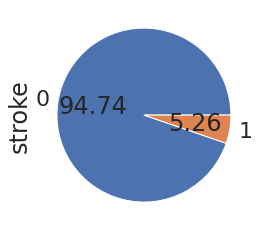

In [ ]:
# show pie of stroke
df_nona_balance.stroke.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# declare variable for Random understanding.
X = df_nona_balance.drop(['stroke'], axis=1)
y = df_nona_balance['stroke']

In [ ]:
# Manage imbalanced datasets

# Random
rus = RandomUnderSampler(sampling_strategy = 1,random_state=3)
X_res, y_res = rus.fit_resample(X, y)

# create data to dataFrame.
df_nona_balance = pd.DataFrame(X_res)

# fix X with df_nona.
df_nona_balance.columns = X.columns

# Add colunm 'stroke' in df_nona.
y_res = pd.Series(y_res)
df_nona_balance['stroke'] = y_res

In [ ]:
y_res.value_counts()

1    180
0    180
Name: stroke, dtype: int64

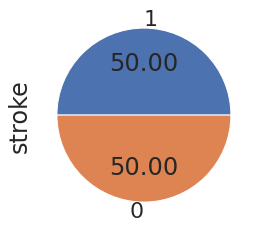

In [ ]:
# check data in 'df_nona'
df_nona_balance.stroke.value_counts().plot.pie(autopct='%.2f')

In [ ]:
# check data
df_nona_balance.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 360 entries, 0 to 359
Data columns (total 21 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              360 non-null    int64  
 1   age                             360 non-null    float64
 2   hypertension                    360 non-null    int64  
 3   heart_disease                   360 non-null    int64  
 4   avg_glucose_level               360 non-null    float64
 5   bmi                             360 non-null    float64
 6   gender_Female                   360 non-null    uint8  
 7   gender_Male                     360 non-null    uint8  
 8   ever_married_No                 360 non-null    uint8  
 9   ever_married_Yes                360 non-null    uint8  
 10  work_type_Govt_job              360 non-null    uint8  
 11  work_type_Never_worked          360 non-null    uint8  
 12  work_type_Private               360 

### Drop colunms.

We drop the work_type_Never_worked, work_type_children because in this section, the stroke data has a large difference of 0,1.

In [ ]:
# check colunm 'work_type_Never_worked'.
df_nona_balance['work_type_Never_worked'].value_counts()

0    360
Name: work_type_Never_worked, dtype: int64

In [ ]:
# check colunm 'work_type_children'.
df_nona_balance['work_type_children'].value_counts()

0    353
1      7
Name: work_type_children, dtype: int64

In [ ]:
# drop colunm 'work_type_Never_worked','work_type_children'.
df_nona_balance = df_nona_balance.drop(['work_type_Never_worked','work_type_children'], axis=1)

In this section we will cut the bmi value since BMI > 50 because stroke values ​​0 and 1 are very different, so they are not used to train models. 

In [ ]:
# drop record 'bmi' > 50.
index_bmi = df_nona_balance[df_nona_balance['bmi'] > 50].index
df_nona_balance.drop(index_bmi, inplace = True)

Text(0.5, 1.0, 'storke and non-stroke against bmi')

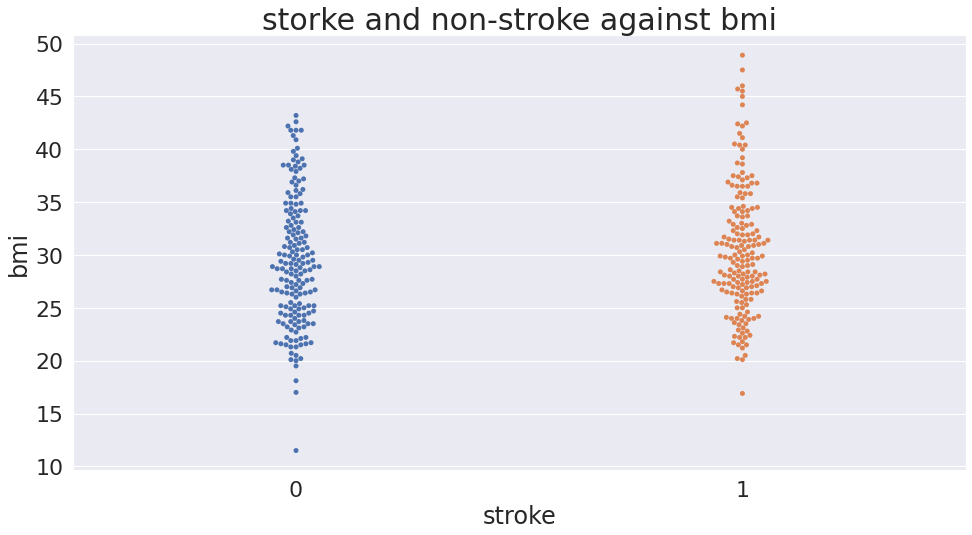

In [ ]:
# show swarmplot of dataimbalance stroke with bmi.
plt.figure( figsize= (16,8))
stgc=sns.swarmplot(x='stroke', y='bmi', data=df_nona_balance);
stgc.set_title("storke and non-stroke against bmi",fontsize=30)

Text(0.5, 1.0, 'storke and non-stroke against bmi')

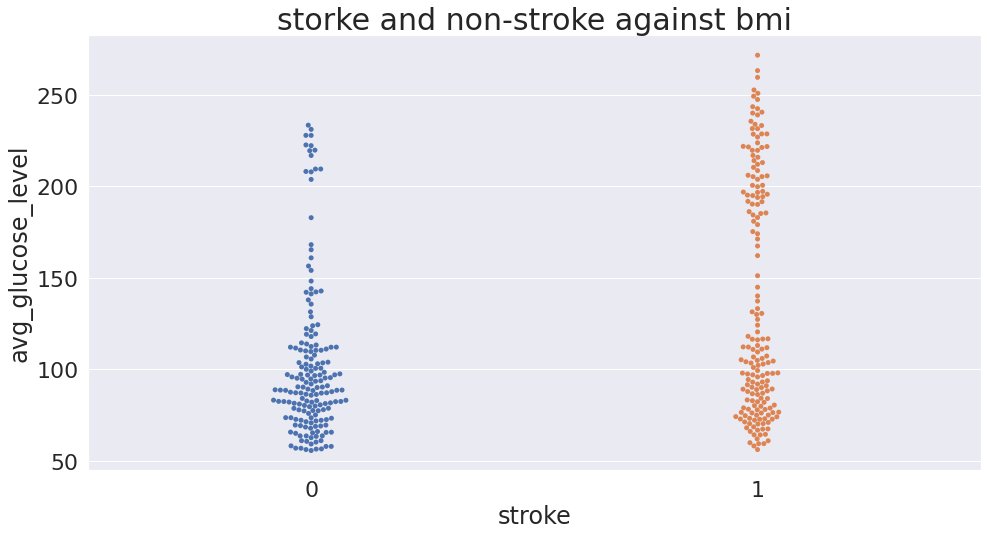

In [ ]:
# show swarmplot of dataimbalance stroke with avg_glucose_level.
plt.figure( figsize= (16,8))
stgc=sns.swarmplot(x='stroke', y='avg_glucose_level', data=df_nona_balance);
stgc.set_title("storke and non-stroke against bmi",fontsize=30)

Text(0.5, 1.0, 'storke and non-stroke against bmi')

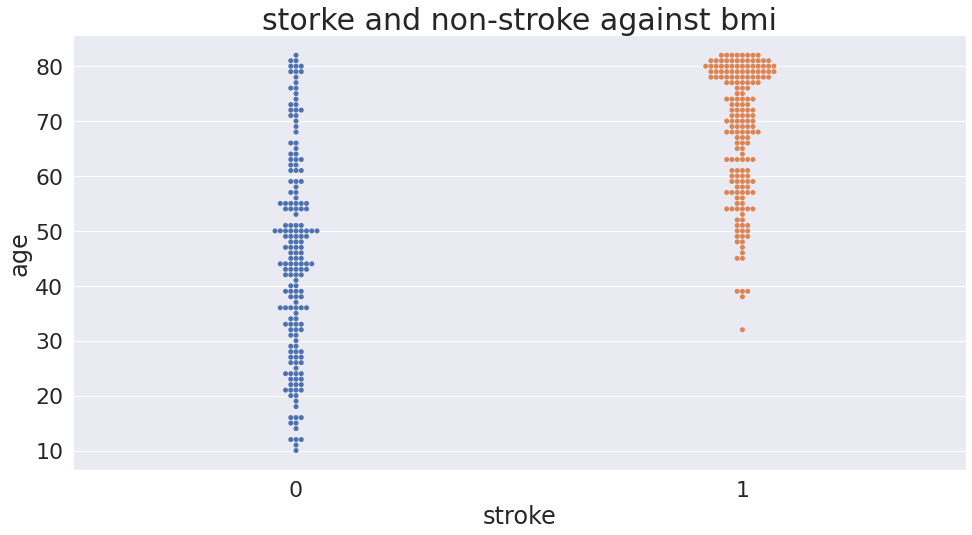

In [ ]:
# swarmplot of dataimbalance stroke with age.
plt.figure( figsize= (16,8))
stgc=sns.swarmplot(x='stroke', y='age', data=df_nona_balance);
stgc.set_title("storke and non-stroke against bmi",fontsize=30)

### Check df_nona

In [ ]:
# show data.
df_nona_balance.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
0,53121,44.0,0,0,63.60,37.3,0,1,0,1,0,1,0,0,1,0,1,0,0
1,67667,72.0,1,0,112.12,30.5,1,0,0,1,0,0,1,1,0,0,1,0,0
2,15422,31.0,0,0,80.57,28.2,0,1,1,0,1,0,0,1,0,1,0,0,0
3,31795,61.0,0,0,73.24,34.9,0,1,0,1,0,0,1,0,1,0,1,0,0
4,59993,40.0,0,0,60.96,11.5,0,1,0,1,0,1,0,1,0,0,1,0,0


In [ ]:
# check info of data.
df_nona_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 359
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              354 non-null    int64  
 1   age                             354 non-null    float64
 2   hypertension                    354 non-null    int64  
 3   heart_disease                   354 non-null    int64  
 4   avg_glucose_level               354 non-null    float64
 5   bmi                             354 non-null    float64
 6   gender_Female                   354 non-null    uint8  
 7   gender_Male                     354 non-null    uint8  
 8   ever_married_No                 354 non-null    uint8  
 9   ever_married_Yes                354 non-null    uint8  
 10  work_type_Govt_job              354 non-null    uint8  
 11  work_type_Private               354 non-null    uint8  
 12  work_type_Self-employed         354 

In [ ]:
# check 'describe'.
df_nona_balance.describe()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,gender_Female,gender_Male,ever_married_No,ever_married_Yes,work_type_Govt_job,work_type_Private,work_type_Self-employed,Residence_type_Rural,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes,stroke
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,37224.737288,56.782486,0.211864,0.127119,119.545678,29.932203,0.610169,0.389831,0.211864,0.788136,0.129944,0.635593,0.214689,0.451977,0.548023,0.282486,0.491525,0.225989,0.505650
std,21545.674570,19.200024,0.409208,0.333577,56.357495,6.042211,0.488402,0.488402,0.409208,0.409208,0.336717,0.481945,0.411188,0.498393,0.498393,0.450846,0.500636,0.418824,0.500676
min,210.000000,10.000000,0.000000,0.000000,55.580000,11.500000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,17265.250000,44.000000,0.000000,0.000000,78.067500,25.650000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,37977.000000,59.000000,0.000000,0.000000,97.050000,29.250000,1.000000,0.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000
75%,55901.250000,74.000000,0.000000,0.000000,147.405000,33.700000,1.000000,1.000000,0.000000,1.000000,0.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000
max,72289.000000,82.000000,1.000000,1.000000,271.740000,48.900000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


Check to see which columns the stroke (0,1) values ​​are very different from.

In [ ]:
# shape
df_nona_balance.shape

(354, 19)

In [ ]:
# gender_Female
df_nona_balance.gender_Female.value_counts()

1    216
0    138
Name: gender_Female, dtype: int64

In [ ]:
# hypertension
df_nona_balance.hypertension.value_counts()

0    279
1     75
Name: hypertension, dtype: int64

In [ ]:
# heart_disease
df_nona_balance.heart_disease.value_counts()

0    309
1     45
Name: heart_disease, dtype: int64

In [ ]:
# ever_married Yes
df_nona_balance.ever_married_Yes.value_counts()

1    279
0     75
Name: ever_married_Yes, dtype: int64

In [ ]:
# work_type_Never_worked
df_nona_balance.work_type_Private.value_counts()

1    225
0    129
Name: work_type_Private, dtype: int64

In [ ]:
# work_type_Self-employed 
df_nona_balance['work_type_Self-employed'].value_counts()

0    278
1     76
Name: work_type_Self-employed, dtype: int64

In [ ]:
# work_type_Govt_job
df_nona_balance.work_type_Govt_job.value_counts()

0    308
1     46
Name: work_type_Govt_job, dtype: int64

In [ ]:
# Residence_type_Rural
df_nona_balance.Residence_type_Rural.value_counts()

0    194
1    160
Name: Residence_type_Rural, dtype: int64

In [ ]:
# smoking_status_formerly smoked
df_nona_balance['smoking_status_formerly smoked'].value_counts()

0    254
1    100
Name: smoking_status_formerly smoked, dtype: int64

In [ ]:
# smoking_status_never smoked
df_nona_balance['smoking_status_never smoked'].value_counts()

0    180
1    174
Name: smoking_status_never smoked, dtype: int64

In [ ]:
# smoking_status_smokes
df_nona_balance.smoking_status_smokes.value_counts()

0    274
1     80
Name: smoking_status_smokes, dtype: int64

In [ ]:
# stroke
df_nona_balance.stroke.value_counts()

1    179
0    175
Name: stroke, dtype: int64

### Change type 'float' to 'int'.

In [ ]:
# change type of data.
df_nona_balance['id'] = df_nona_balance['id'].astype('int')
df_nona_balance['hypertension'] = df_nona_balance['hypertension'].astype('int')
df_nona_balance['heart_disease'] = df_nona_balance['heart_disease'].astype('int')
df_nona_balance['gender_Female'] = df_nona_balance['gender_Female'].astype('int')
df_nona_balance['gender_Male'] = df_nona_balance['gender_Male'].astype('int')
df_nona_balance['ever_married_No'] = df_nona_balance['ever_married_No'].astype('int')
df_nona_balance['ever_married_Yes'] = df_nona_balance['ever_married_Yes'].astype('int')
df_nona_balance['work_type_Govt_job'] = df_nona_balance['work_type_Govt_job'].astype('int')
df_nona_balance['work_type_Private'] = df_nona_balance['work_type_Private'].astype('int')
df_nona_balance['work_type_Self-employed'] = df_nona_balance['work_type_Self-employed'].astype('int')
df_nona_balance['Residence_type_Rural'] = df_nona_balance['Residence_type_Rural'].astype('int')
df_nona_balance['Residence_type_Urban'] = df_nona_balance['Residence_type_Urban'].astype('int')
df_nona_balance['smoking_status_formerly smoked'] = df_nona_balance['smoking_status_formerly smoked'].astype('int')
df_nona_balance['smoking_status_never smoked'] = df_nona_balance['smoking_status_never smoked'].astype('int')
df_nona_balance['smoking_status_smokes'] = df_nona_balance['smoking_status_smokes'].astype('int')

In [ ]:
# check data after change type.
df_nona_balance.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 354 entries, 0 to 359
Data columns (total 19 columns):
 #   Column                          Non-Null Count  Dtype  
---  ------                          --------------  -----  
 0   id                              354 non-null    int64  
 1   age                             354 non-null    float64
 2   hypertension                    354 non-null    int64  
 3   heart_disease                   354 non-null    int64  
 4   avg_glucose_level               354 non-null    float64
 5   bmi                             354 non-null    float64
 6   gender_Female                   354 non-null    int64  
 7   gender_Male                     354 non-null    int64  
 8   ever_married_No                 354 non-null    int64  
 9   ever_married_Yes                354 non-null    int64  
 10  work_type_Govt_job              354 non-null    int64  
 11  work_type_Private               354 non-null    int64  
 12  work_type_Self-employed         354 

# Modeling

In the modeling section, we use classification for modeling. 
It will find cross, accuracy and other values with accuracy in the range of 0.80. 
When we throw data into modeling for prediction itself.

## Modeling Classification Algorithms - Logistic Regression for stroke prediction.

In [ ]:
X = df_nona_balance.drop(['stroke','id'], axis=1)
y = df_nona_balance['stroke']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, y, train_size=0.80, random_state=42)

## Build an RandomForestClassifier

The algorithm we use is RandomForestClassifier.

RandomForestClassifier

In [ ]:
# use rbf kernel to train model.
model_svc_balance = RandomForestClassifier(max_depth=5, n_estimators=100)
clf = model_svc_balance.fit(X_train, Y_train)
score_modeling_balance = clf.score(X_test,Y_test)
score_modeling_balance

0.8309859154929577

## Cross Validation

Average from train the model 5 times.

In [ ]:
score = cross_val_score(model_svc_balance,X_train,Y_train,cv=5,scoring="accuracy") #cv set K fold of validation
score

array([0.78947368, 0.68421053, 0.73684211, 0.71428571, 0.76785714])

In [ ]:
score.mean()

0.7385338345864663

## Confusion Matrix

When throwing a data test into a model, the following predictions are obtained:

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


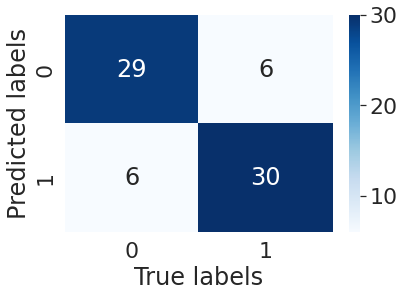

In [ ]:
confusion_matrix_balance = confusion_matrix(Y_test, model_svc_balance.predict(X_test))
sns.heatmap(confusion_matrix_balance, annot=True, cmap='Blues')
plt.subplot().set_xlabel('True labels')
plt.subplot().set_ylabel('Predicted labels')
plt.show()

## Report

In this section, check the model for precision, recall, f1-score.

In [ ]:
classification_report_balance = classification_report(Y_test, model_svc_balance.predict(X_test))
print(classification_report_balance)

              precision    recall  f1-score   support

           0       0.83      0.83      0.83        35
           1       0.83      0.83      0.83        36

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



accuracy : 0.82

precistion : 0 = 0.79 and 1 = 0.85

recall : 0 = 0.86 and 1 = 0.78

f1-score : 0 = 0.82 and 1 = 0.81

# Ensemble

## Ensemble learning

We implement ensemble learning because to increase the efficiency of the model. It is used in the bagging section to train data by separating the dataset from the data Then create a model and combine the prediction results of combine models.

RandomForestClassifier

In [ ]:
#bagging classifier
model_bg_full_data = BaggingClassifier(RandomForestClassifier(max_depth=5, n_estimators=100)).fit(X_train, Y_train)

In [ ]:
print(model_bg_full_data.score(X_test, Y_test))

0.8309859154929577


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:3: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  This is separate from the ipykernel package so we can avoid doing imports until
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  after removing the cwd from sys.path.


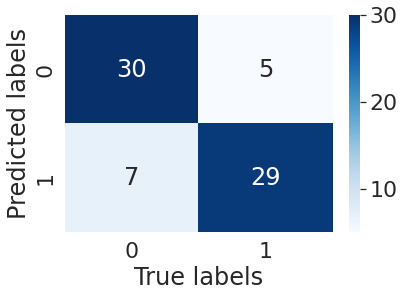

In [ ]:
confusion_matrix_full_data = confusion_matrix(Y_test, model_bg_full_data.predict(X_test))
sns.heatmap(confusion_matrix_full_data, annot=True, cmap='Blues')
plt.subplot().set_xlabel('True labels')
plt.subplot().set_ylabel('Predicted labels')
plt.show()

Check how much our model is ready to use(precision, recall, f1-score.).

In [ ]:
classification_report_full_data = classification_report(Y_test, model_bg_full_data.predict(X_test))
print(classification_report_full_data)  

              precision    recall  f1-score   support

           0       0.81      0.86      0.83        35
           1       0.85      0.81      0.83        36

    accuracy                           0.83        71
   macro avg       0.83      0.83      0.83        71
weighted avg       0.83      0.83      0.83        71



accuracy : 0.83

precistion : 0 = 0.81 and 1 = 0.85

recall : 0 = 0.86 and 1 = 0.81

f1-score : 0 = 0.83 and 1 = 0.83

# Using the model to find stroke opportunities, the information that the user must have is as follows:

1.age

2.hypertension

3.heart_disease

4.avg_glucose_level

5.bmi (must not be more than 50)

6.gender_Female

7.ever_married

8.work_type (Choose 1 option, all 3 choices are: Govt_job, Private, Self-employed)

9.Residence (Rural,Urban)

10.smoking_status (formerly smoked, never smoked, smokes)

# Reference

DecisionForest. Machine Learning Classification How to Deal with Imbalanced Data ❌ Practical
ML Project with Python [online]. 2020. 
source : https://www.youtube.com/watch?v=L7Xj9dRfSKk&amp;t=316s [01/11/2021]

Data Professor. How to handle imbalanced datasets in Python with Python [online]. 2021.
source : https://www.youtube.com/watch?v=4SivdTLIwHc&amp;t=589s [01/11/2021]

DecisionForest. Ensemble learners [online]. 2016. 
source : https://www.youtube.com/watch?v=Un9zObFjBH0 [01/11/2021]

Scikit learn. sklearn.ensemble.BaggingClassifier [online]. 2017-2021. 
source : https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.BaggingClassifier.html
[01/11/2021]

Ajitesh Kumar. Bagging Classifier Python Code Example [online]. 2021. 
source : https://vitalflux.com/bagging-classifier-python-code-example/ [01/11/2021]

Mohammed Alhamid. Ensemble Models [online]. 2021. 
source : https://towardsdatascience.com/ensemble-models-5a62d4f4cb0c [01/11/2021]

Programcreek. Python imblearn.under_sampling.RandomUnderSampler() Examples [online].
source : https://www.programcreek.com/python/example/119405/imblearn.under_sampling.RandomUnderSampler?fbclid=IwAR1tUdHUWjhcVPbKT7xLfh618THNqF_hYjBnkPl_mIgKLWhkmTxwARZCb1w [01/11/2021]

Mirko Stojiljković. Logistic Regression Python Packages [online]. 2019. 
source : https://realpython.com/logistic-regression-python/?fbclid=IwAR2MbVuWtCltRYDn-GXnUF51FOi5khFChVyHYqxoZU8vhrOvWQ2ieY_5iCw#logistic-regression-python-packages
[01/11/2021]

Dennis T. Confusion Matrix Visualization [online]. 2019. 
source : https://medium.com/@dtuk81/confusion-matrix-visualization-fc31e3f30fea
[01/11/2021]